In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\pattargv\Downloads\Test_Data\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

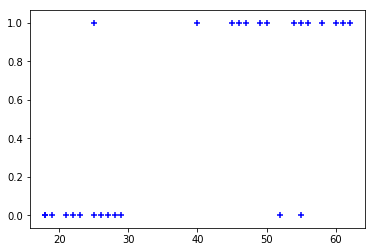

In [6]:
plt.scatter(df.age, df.bought_insurance, marker = '+', color = 'Blue' )

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance,test_size =0.2)

In [9]:
X_test

,age
2,47
26,23
5,56
7,60
13,29
24,50


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train,y_train)

c:\users\pattargv\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
X_test


,age
2,47
26,23
5,56
7,60
13,29
24,50


In [13]:
y_predicted = model.predict(X_test)

In [14]:
model.predict_proba(X_test)

array([[0.35485472, 0.64514528],
       [0.61513426, 0.38486574],
       [0.26937724, 0.73062276],
       [0.23584966, 0.76415034],
       [0.55039523, 0.44960477],
       [0.32495202, 0.67504798]])

In [15]:
model.score(X_test, y_test)

1.0

In [16]:
y_predicted

array([1, 0, 1, 1, 0, 1], dtype=int64)

In [17]:
X_test

,age
2,47
26,23
5,56
7,60
13,29
24,50


In [18]:
df = pd.read_csv(r"C:\Users\pattargv\Downloads\Test_Data\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [20]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [21]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


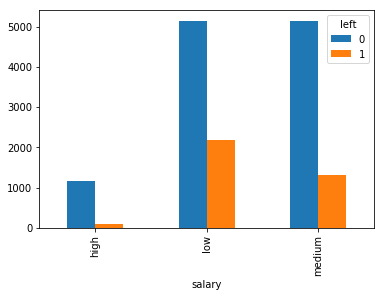

In [22]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014602278>,
      dtype=object)

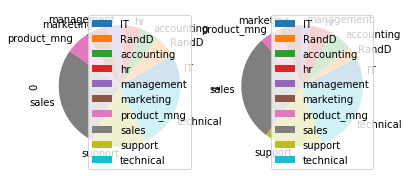

In [25]:
pd.crosstab(df.Department,df.left).plot(kind='pie', subplots=True)

In [29]:
subdf = df[['satisfaction_level','average_montly_hours', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [30]:
sal_dummies = pd.get_dummies(subdf.salary, prefix = 'salary')

In [32]:
df_with_dummies = pd.concat([subdf, sal_dummies], axis = "columns")

In [33]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [34]:
df_with_dummies.drop("salary", axis = 'columns', inplace = True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [35]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [36]:
y = df.left

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)